In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
import urllib, os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
accidents = pd.concat([pd.read_csv(file) for file in glob.glob('Data/Acidentes/*.csv')], ignore_index = True)

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52155 entries, 0 to 52154
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COD_ACIDENTE               52155 non-null  int64  
 1   DISTRITO                   52155 non-null  object 
 2   CONCELHO                   52155 non-null  object 
 3   FREGUESIA                  52155 non-null  object 
 4   LATITUDE                   52155 non-null  float64
 5   LONGITUDE                  52155 non-null  float64
 6   TIPO_VIA                   52155 non-null  object 
 7   VIA                        52155 non-null  object 
 8   KM                         52155 non-null  float64
 9   FL_LESAO_MORTOS30DIAS      52155 non-null  object 
 10  QT_FLIGEIROS               52155 non-null  int64  
 11  QT_FLIGEIROS_MORTOS30DIAS  52155 non-null  int64  
 12  QT_FGRAVES                 52155 non-null  int64  
 13  QT_FGRAVES_MORTOS30DIAS    52155 non-null  int

In [4]:
accidents.shape

(52155, 61)

In [5]:
drop_list = ["CONCELHO", "FREGUESIA", "TIPO_VIA", "FL_LESAO_MORTOS30DIAS", "QT_FLIGEIROS_MORTOS30DIAS", 
             "QT_FGRAVES_MORTOS30DIAS", "QT_MORTOS_MORTOS30DIAS", "VEL_LIM_GERAL", "ENTIDADE_FISCALIZADORA",
             "ESTADO_CONSERVACAO", "MARCA_VIA", "NATUREZA_ACIDENTE", "OBSTACULO", "TIPO_PISO", "VIA_TRANSITO",
             "ANO", "MES", "DIA", "HORA", "AREA_METROPOLITANA", "FERIADO", "COD_INE", "COD_DISTRITO", "COD_CONCELHO", 
             "COD_FREGUESIA_POL", "COD_DISTRITO_POL", "COD_CONCELHO_POL", 
             "INDICADOR_GRAVIDADE30DIAS"]
accidents = accidents.drop(labels = drop_list, axis = 1)

In [6]:
accidents.shape

(52155, 33)

In [7]:
accidents.VEL_LIM_LOCAL.fillna(accidents.VEL_LIM_LOCAL.median(), inplace=True)

In [8]:
accidents.isna().sum()/len(accidents)

COD_ACIDENTE           0.00000
DISTRITO               0.00000
LATITUDE               0.00000
LONGITUDE              0.00000
VIA                    0.00000
KM                     0.00000
QT_FLIGEIROS           0.00000
QT_FGRAVES             0.00000
QT_MORTOS              0.00000
QT_VEIC_CICLOMOTOR     0.00000
QT_VEIC_LIGEIRO        0.00000
QT_VEIC_OUTRO          0.00000
QT_VEIC_PESADO         0.00000
QT_VIAS_SENTIDO        0.03944
VEL_LIM_LOCAL          0.00000
BERMA_VIA              0.00000
CONDICAO_ADERENCIA     0.00000
FAIXA_RODAGEM          0.00000
FATOR_ATMOSFERICO      0.00000
INTERSECAO_VIA         0.00000
LOCALIZACAO            0.00000
LUMINOSIDADE           0.00000
PERFIL_VIA             0.00000
PLANTA_VIA             0.00000
SINAL_LUMINOSO         0.00000
SITUACAO_ACIDENTE      0.00000
TIPO_NATUREZA          0.00000
DIA_SEMANA             0.00000
INDICADOR_GRAVIDADE    0.00000
FLAG_FERIADO           0.00000
QT_VEICULOS            0.00000
COD_FREGUESIA          0.00000
DATA_ACI

In [9]:
accidents.QT_VIAS_SENTIDO.fillna(accidents.QT_VIAS_SENTIDO.median(), inplace=True)

In [10]:
'''Separamos a data da hora e criamos uma nova entrada para cada'''
datas = []
horas = []
for date in accidents.DATA_ACIDENTE:
    aux = date.split(" ")
    aux2 = aux[0].split("-")
    data = aux2[2] + '/' + aux2[1] + '/' + aux2[0]
    datas.append(data)
    horas.append(aux[1])

accidents['DATA'] = datas
accidents['HORA'] = horas

accidents['DATA'] = pd.to_datetime(accidents['DATA'], format='%d/%m/%Y')

accidents['HORA'] = pd.to_datetime(accidents['HORA'], format='%H:%M:%S').dt.hour

accidents.HORA = accidents.HORA.astype('int')

accidents = accidents.drop('DATA_ACIDENTE', axis = 1)

In [11]:
'''Numero de veiculos pode ser condensado numa só coluna'''

accidents["QT_VEICULOS"] = accidents['QT_VEIC_CICLOMOTOR'] + accidents['QT_VEIC_LIGEIRO'] + accidents['QT_VEIC_OUTRO'] + accidents['QT_VEIC_PESADO']

drop_list = ['QT_VEIC_CICLOMOTOR', 'QT_VEIC_LIGEIRO', 'QT_VEIC_OUTRO', 'QT_VEIC_PESADO']

accidents.QT_VEICULOS = accidents.QT_VEICULOS.astype('int')

accidents = accidents.drop(drop_list, axis = 1)

In [12]:
accidents.INDICADOR_GRAVIDADE.value_counts(normalize=True)

3      0.650312
6      0.162611
9      0.048720
10     0.039268
12     0.019193
         ...   
139    0.000019
250    0.000019
265    0.000019
169    0.000019
319    0.000019
Name: INDICADOR_GRAVIDADE, Length: 122, dtype: float64

In [13]:
def severity_grouping(sever):
    if sever >= 0 and sever <= 106:
        return 'ligeiro'
    if sever > 106 and sever <= 212:
        return 'grave'
    if sever > 212:
        return 'muito grave'
    
accidents['GRAVIDADE'] = accidents['INDICADOR_GRAVIDADE'].apply(severity_grouping)

accidents = accidents.drop('INDICADOR_GRAVIDADE', axis = 1)

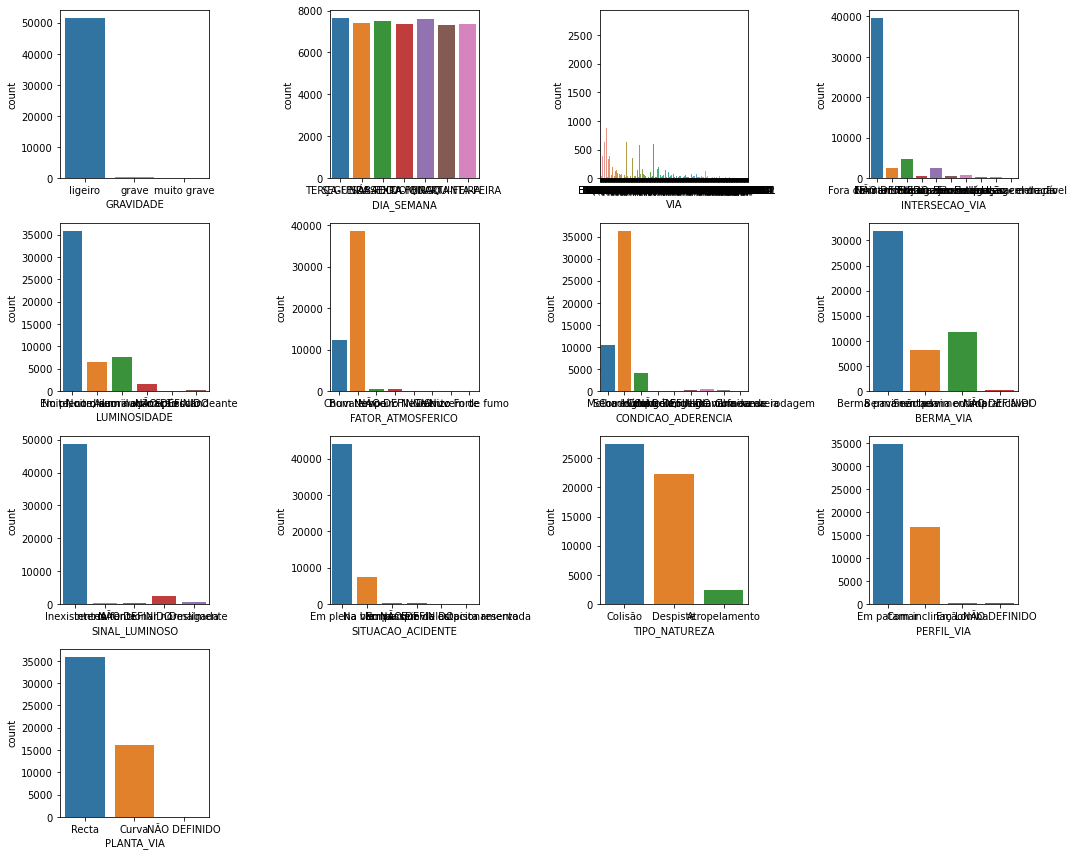

In [14]:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(4,4,1)
sns.countplot(accidents['GRAVIDADE'])
ax2 = plt.subplot(4,4,2)
sns.countplot(accidents['DIA_SEMANA'])
ax3 = plt.subplot(4,4,3)
sns.countplot(accidents['VIA'])
ax4 = plt.subplot(4,4,4)
sns.countplot(accidents['INTERSECAO_VIA'])
ax5 = plt.subplot(4,4,5)
sns.countplot(accidents['LUMINOSIDADE'])
ax6 = plt.subplot(4,4,6)
sns.countplot(accidents['FATOR_ATMOSFERICO'])
ax7 = plt.subplot(4,4,7)
sns.countplot(accidents['CONDICAO_ADERENCIA'])
ax8 = plt.subplot(4,4,8)
sns.countplot(accidents['BERMA_VIA'])
ax9 = plt.subplot(4,4,9)
sns.countplot(accidents['SINAL_LUMINOSO'])
ax10 = plt.subplot(4,4,10)
sns.countplot(accidents['SITUACAO_ACIDENTE'])
ax11 = plt.subplot(4,4,11)
sns.countplot(accidents['TIPO_NATUREZA'])
ax12 = plt.subplot(4,4,12)
sns.countplot(accidents['PERFIL_VIA'])
ax13 = plt.subplot(4,4,13)
sns.countplot(accidents['PLANTA_VIA'])
plt.tight_layout()
plt.show()

In [15]:
''' Podemos deitar fora as colunas que estão muito desiquilibradas por exemplo o Sinal Luminoso '''

accidents = accidents.drop('SINAL_LUMINOSO', axis = 1)

In [16]:
accidents.LUMINOSIDADE.value_counts(normalize=True)

Em pleno dia             0.688199
Noite, sem iluminação    0.146908
Noite, com iluminação    0.126814
Aurora ou crepúsculo     0.032193
Sol escandeante          0.005119
NÃO DEFINIDO             0.000767
Name: LUMINOSIDADE, dtype: float64

In [17]:
def was_daylight(light):
    if light == 'Em pleno dia' or light == 'Sol escandeante':
        return 'Sim'
    else:
        return 'Nao'
    
accidents['ERA_DIA'] = accidents['LUMINOSIDADE'].apply(was_daylight)

In [18]:
accidents.FATOR_ATMOSFERICO.value_counts(normalize=True)

Bom tempo        0.741636
Chuva            0.234302
Nevoeiro         0.011006
NÃO DEFINIDO     0.008072
Granizo          0.002128
Neve             0.001706
Vento Forte      0.001055
Nuvem de fumo    0.000096
Name: FATOR_ATMOSFERICO, dtype: float64

In [19]:
def was_badweather(weather):
    if weather == 'Bom tempo':
        return 'Nao'
    else:
        return 'Sim'

accidents['MAU_TEMPO'] = accidents['FATOR_ATMOSFERICO'].apply(was_badweather)

In [20]:
accidents.CONDICAO_ADERENCIA.value_counts(normalize=True)

Seco e limpo                              0.696347
Molhado                                   0.201150
Húmido                                    0.080031
Com água acumulada na faixa de rodagem    0.009510
Com gelo, geada ou neve                   0.006519
Com gravilha ou areia                     0.002953
Com óleo                                  0.002205
NÃO DEFINIDO                              0.000959
Com lama                                  0.000326
Name: CONDICAO_ADERENCIA, dtype: float64

In [21]:
def road_was_dry(road):
    if road == 'Seco e limpo':
        return'Sim'
    else:
        return 'Nao'

accidents['ESTRADA_SECA'] = accidents['CONDICAO_ADERENCIA'].apply(road_was_dry)

In [22]:
accidents[accidents['VEL_LIM_LOCAL']<=10]

,COD_ACIDENTE,DISTRITO,LATITUDE,LONGITUDE,VIA,KM,QT_FLIGEIROS,QT_FGRAVES,QT_MORTOS,QT_VIAS_SENTIDO,...,DIA_SEMANA,FLAG_FERIADO,QT_VEICULOS,COD_FREGUESIA,DATA,HORA,GRAVIDADE,ERA_DIA,MAU_TEMPO,ESTRADA_SECA
3508,2008304423,Porto,41.244560,-8.435582,A42,2.75,1,0,0,3.0,...,SÁBADO,0,2,13,2007-12-15,20,ligeiro,Nao,Nao,Sim
9095,2009409802,Braga,41.443771,-8.093931,EN206,62.43,3,0,0,1.0,...,SEGUNDA-FEIRA,0,2,28,2009-08-06,15,ligeiro,Sim,Nao,Sim
14390,2011533427,Bragança,41.759188,-6.917617,ER206,225.10,1,0,0,1.0,...,QUARTA-FEIRA,0,2,49,2011-04-03,14,ligeiro,Sim,Nao,Sim
14874,2011540187,Aveiro,40.831532,-8.664482,EN327,34.50,1,0,0,1.0,...,TERÇA-FEIRA,0,2,5,2011-05-28,23,ligeiro,Nao,Nao,Sim
19429,2008340376,Setúbal,38.577059,-8.894111,EN379,35.10,1,0,0,2.0,...,SEXTA-FEIRA,0,1,2,2008-09-19,17,ligeiro,Sim,Nao,Sim
25253,2007299747,Porto,41.309762,-8.705524,EN(d)13,16.95,1,0,0,1.0,...,TERÇA-FEIRA,0,2,16,2007-10-27,0,ligeiro,Nao,Nao,Sim
25264,2010426765,Viana do Castelo,41.648544,-8.706891,ER308,4.80,1,0,0,1.0,...,QUINTA-FEIRA,0,2,22,2009-11-19,13,ligeiro,Sim,Nao,Sim
33957,2009383566,Braga,41.542982,-8.592446,ER205,25.90,1,0,0,1.0,...,SEGUNDA-FEIRA,0,2,77,2009-05-12,8,ligeiro,Sim,Sim,Nao
36911,2009415886,Leiria,39.771951,-8.352228,EN(d)110,75.56,1,0,0,1.0,...,SÁBADO,0,2,7,2009-09-30,18,ligeiro,Sim,Nao,Nao
38376,2007280271,Porto,41.279663,-7.997798,IP4,66.70,1,0,0,2.0,...,SEXTA-FEIRA,0,2,30,2007-04-30,14,ligeiro,Sim,Sim,Nao


In [23]:
# Eliminar as entradas onde o limite de velocidade é menor ou igual a 0, é provável que seja erro
accidents = accidents.drop(accidents[accidents.VEL_LIM_LOCAL <= 10].index)

# Converting to integers
accidents.VEL_LIM_LOCAL = accidents.VEL_LIM_LOCAL.astype('int64')

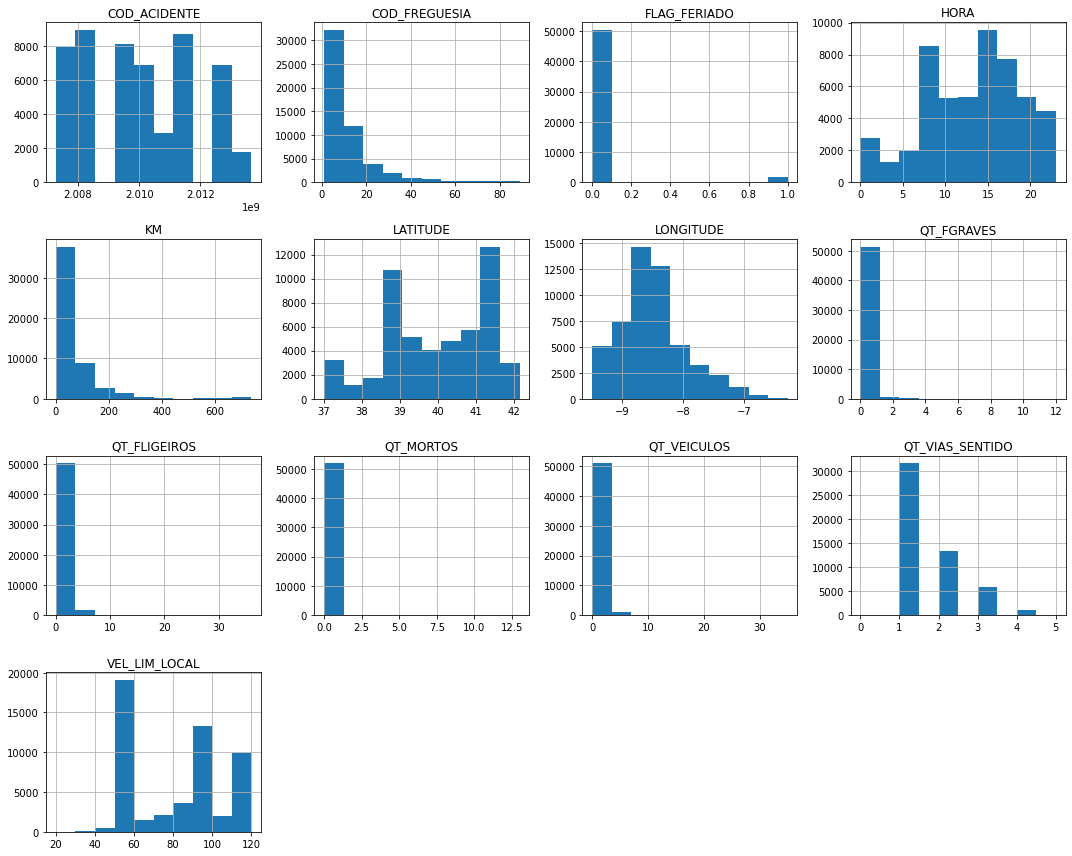

In [24]:
accidents.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

In [25]:
#accidents['LOG_NUMERO_DE_MORTOS'] = np.log(accidents.QT_MORTOS)
#accidents['LOG_NUMERO_DE_VEICULOS'] = np.log(accidents.QT_VEICULOS)
#accidents['LOG_FERIDOS_LIGEIROS'] = np.log(accidents.QT_FLIGEIROS)
#accidents['LOG_FERIDOS_GRAVES'] = np.log(accidents.QT_FGRAVES)

In [26]:
#def handle_inf(n):
#    if not n.is_integer():
#        return 0;
#    else:
#        return n
    
#accidents['LOG_NUMERO_DE_MORTOS'] = accidents['LOG_NUMERO_DE_MORTOS'].apply(handle_inf)
#accidents['LOG_NUMERO_DE_VEICULOS'] = accidents['LOG_NUMERO_DE_MORTOS'].apply(handle_inf)
#accidents['LOG_FERIDOS_LIGEIROS'] = accidents['LOG_NUMERO_DE_MORTOS'].apply(handle_inf)
#accidents['LOG_FERIDOS_GRAVES'] = accidents['LOG_NUMERO_DE_MORTOS'].apply(handle_inf)

In [27]:
#accidents[['LOG_NUMERO_DE_MORTOS', 'LOG_NUMERO_DE_VEICULOS', 'LOG_FERIDOS_LIGEIROS', 'LOG_FERIDOS_GRAVES']].hist()
#plt.show()

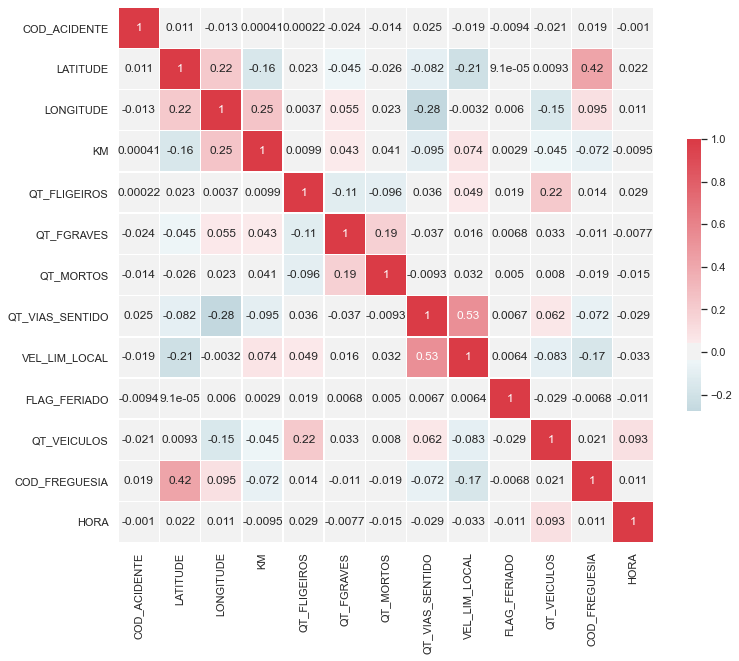

In [28]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = accidents.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [29]:
#accidents.to_csv('Data/Processed/Processed_data1.csv')

## Dados sobre a densidade populacional

In [30]:
population = pd.read_csv('data/População/dados_ine2.csv', sep =";")

In [31]:
population.head()

,NIVEL_ADMINISTRATIVO,GEO_COD,GEO_COD_DSG,POP_RESIDENTE_M,POP_RESIDENTE_F,POP_PRESENTE_M,POP_PRESENTE_F,POP_ATIVA_M,POP_ATIVA_F,POP_EMPREGADA_M,...,M_65_74,M_75,F_0_14,F_15_24,F_25_64,F_65_74,F_75,COD_DISTRITO_INE,COD_CONCELHO_INE,COD_FREGUESIA_INE
0,6,131301,A Ver-o-Mar,4111,4564,3890,4472,2198,2108,1904,...,315,147.0,733.0,477.0,2702,371,281.0,15,219,2953
1,6,30864,Abação (São Tomé),1143,1109,1129,1094,653,542,563,...,61,38.0,214.0,149.0,631,67,48.0,4,55,578
2,6,171401,Abaças,465,500,433,465,190,149,173,...,53,42.0,55.0,41.0,245,75,84.0,19,282,3859
3,6,30201,Abade de Neiva,971,1053,898,1009,536,503,469,...,76,32.0,165.0,143.0,608,72,65.0,4,54,489
4,6,40701,Abambres,179,168,174,169,79,43,77,...,29,24.0,12.0,9.0,83,37,27.0,5,72,1129


In [32]:
drop_list = ['NIVEL_ADMINISTRATIVO', 'GEO_COD', 'GEO_COD_DSG', 'POP_EMPREGADA_M', 'POP_EMPREGADA_F', 'POP_DESEMPREGADA_M',
             'POP_DESEMPREGADA_F', 'TAXA_DESEMPREGO_M', 'TAXA_DESEMPREGO_F', 'POP_EMPREGADA_SET_PRIMARIO', 'POP_EMPREGADA_SET_SECUNDARIO',
             'POP_EMPREGADA_SET_TERCIARIO', 'POP_DESEMPREGADA_PROC_1_EMP_M', 'POP_DESEMPREGADA_PROC_1_EMP_F', 
             'POP_DESEMPREGADA_PROC_NOVO_EMP_M', 'POP_DESEMPREGADA_PROC_NOVO_EMP_F', 'POP_PRESENTE_M', 'POP_PRESENTE_F',
             'POP_ATIVA_M', 'POP_ATIVA_F', 'DENSIDADE_TOTAL_M', 'DENSIDADE_TOTAL_F', 'IDADE_MEDIA', 'M_0_14', 'M_15_24',
             'M_25_64', 'M_65_74', 'M_75','F_0_14', 'F_15_24','F_25_64', 'F_65_74', 'F_75']

population = population.drop(labels = drop_list, axis = 1)

population.head()

,POP_RESIDENTE_M,POP_RESIDENTE_F,DENSIDADE_TOTAL,COD_DISTRITO_INE,COD_CONCELHO_INE,COD_FREGUESIA_INE
0,4111,4564,1686.0,15,219,2953
1,1143,1109,432.3,4,55,578
2,465,500,51.1,19,282,3859
3,971,1053,269.7,4,54,489
4,179,168,18.4,5,72,1129


In [33]:
population['TOTAL'] = population['POP_RESIDENTE_M'] + population['POP_RESIDENTE_F']
drop = ['POP_RESIDENTE_M', 'POP_RESIDENTE_F']
population = population.drop(labels = drop, axis = 1)
population.head()

,DENSIDADE_TOTAL,COD_DISTRITO_INE,COD_CONCELHO_INE,COD_FREGUESIA_INE,TOTAL
0,1686.0,15,219,2953,8675
1,432.3,4,55,578,2252
2,51.1,19,282,3859,965
3,269.7,4,54,489,2024
4,18.4,5,72,1129,347


In [34]:
population.isna().sum()

DENSIDADE_TOTAL      0
COD_DISTRITO_INE     0
COD_CONCELHO_INE     0
COD_FREGUESIA_INE    0
TOTAL                0
dtype: int64

In [35]:
merged_data = pd.merge(accidents, population, how = 'inner', left_on = 'COD_FREGUESIA', right_on = 'COD_FREGUESIA_INE')

In [36]:
merged_data.shape

(52142, 37)

In [37]:
merged_data.head()

,COD_ACIDENTE,DISTRITO,LATITUDE,LONGITUDE,VIA,KM,QT_FLIGEIROS,QT_FGRAVES,QT_MORTOS,QT_VIAS_SENTIDO,...,HORA,GRAVIDADE,ERA_DIA,MAU_TEMPO,ESTRADA_SECA,DENSIDADE_TOTAL,COD_DISTRITO_INE,COD_CONCELHO_INE,COD_FREGUESIA_INE,TOTAL
0,2007278619,Aveiro,40.327072,-8.452956,IC2,203.39,2,0,0,2.0,...,9,ligeiro,Sim,Sim,Nao,141.3,1,1,3,4013
1,2007271496,Faro,37.308766,-8.558736,EN266,57.17,2,0,0,1.0,...,21,ligeiro,Nao,Nao,Sim,141.3,1,1,3,4013
2,2007271243,Lisboa,38.716730,-9.220898,A5,4.00,1,0,0,4.0,...,18,ligeiro,Nao,Sim,Sim,141.3,1,1,3,4013
3,2007271452,Faro,37.092081,-7.701581,ER125,128.15,1,0,0,1.0,...,14,ligeiro,Sim,Nao,Sim,141.3,1,1,3,4013
4,2007271233,Leiria,39.706856,-8.861985,EN(d)356-1,5.45,1,0,0,1.0,...,8,ligeiro,Sim,Nao,Nao,141.3,1,1,3,4013


In [40]:
drop_list = ['COD_DISTRITO_INE', 'COD_CONCELHO_INE', 'COD_FREGUESIA_INE']
merged_data.drop(labels = drop_list, axis = 1)

,COD_ACIDENTE,DISTRITO,LATITUDE,LONGITUDE,VIA,KM,QT_FLIGEIROS,QT_FGRAVES,QT_MORTOS,QT_VIAS_SENTIDO,...,QT_VEICULOS,COD_FREGUESIA,DATA,HORA,GRAVIDADE,ERA_DIA,MAU_TEMPO,ESTRADA_SECA,DENSIDADE_TOTAL,TOTAL
0,2007278619,Aveiro,40.327072,-8.452956,IC2,203.39,2,0,0,2.0,...,4,3,2007-03-19,9,ligeiro,Sim,Sim,Nao,141.3,4013
1,2007271496,Faro,37.308766,-8.558736,EN266,57.17,2,0,0,1.0,...,2,3,2007-01-03,21,ligeiro,Nao,Nao,Sim,141.3,4013
2,2007271243,Lisboa,38.716730,-9.220898,A5,4.00,1,0,0,4.0,...,2,3,2007-01-08,18,ligeiro,Nao,Sim,Sim,141.3,4013
3,2007271452,Faro,37.092081,-7.701581,ER125,128.15,1,0,0,1.0,...,2,3,2007-01-07,14,ligeiro,Sim,Nao,Sim,141.3,4013
4,2007271233,Leiria,39.706856,-8.861985,EN(d)356-1,5.45,1,0,0,1.0,...,1,3,2007-01-12,8,ligeiro,Sim,Nao,Nao,141.3,4013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52137,2008342573,Braga,41.422662,-8.300847,EN105,43.50,1,0,0,1.0,...,2,71,2008-09-25,13,ligeiro,Sim,Nao,Sim,152.3,1924
52138,2007271423,Braga,41.421088,-8.301581,EN105,43.30,2,0,0,1.0,...,3,71,2007-01-09,12,ligeiro,Sim,Nao,Sim,152.3,1924
52139,2007281797,Braga,41.403189,-8.264067,A7,45.18,1,2,0,4.0,...,1,64,2007-05-07,4,ligeiro,Nao,Sim,Nao,1025.7,9157
52140,2010446011,Braga,41.403788,-8.259828,A7,45.54,1,0,0,4.0,...,2,64,2010-02-04,12,ligeiro,Sim,Sim,Nao,1025.7,9157


In [42]:
# Vamos filtrar os dados para a àrea de estudo
study_data = merged_data[merged_data["DISTRITO"] == 'Braga']
merged_data.drop(['DISTRITO'], axis = 1)
merged_data.to_csv('Data/Processed/Portugal-2007_2012.csv')

In [43]:
study_data.head()

,COD_ACIDENTE,DISTRITO,LATITUDE,LONGITUDE,VIA,KM,QT_FLIGEIROS,QT_FGRAVES,QT_MORTOS,QT_VIAS_SENTIDO,...,HORA,GRAVIDADE,ERA_DIA,MAU_TEMPO,ESTRADA_SECA,DENSIDADE_TOTAL,COD_DISTRITO_INE,COD_CONCELHO_INE,COD_FREGUESIA_INE,TOTAL
48,2007281233,Braga,41.580695,-8.788546,EN(d)13,49.95,2,0,0,1.0,...,19,ligeiro,Sim,Nao,Sim,141.3,1,1,3,4013
141,2007295665,Braga,41.383826,-8.315731,EN106,2.00,1,0,0,1.0,...,18,ligeiro,Sim,Nao,Sim,141.3,1,1,3,4013
179,2007294594,Braga,41.591925,-8.785815,EN(d)13,51.25,1,0,0,1.0,...,21,ligeiro,Nao,Nao,Sim,141.3,1,1,3,4013
336,2008333100,Braga,41.598229,-8.785133,EN(d)13,51.95,1,0,0,2.0,...,15,ligeiro,Sim,Nao,Sim,141.3,1,1,3,4013
438,2009366736,Braga,41.601334,-8.784520,EN(d)13,52.30,1,0,0,1.0,...,20,ligeiro,Nao,Nao,Nao,141.3,1,1,3,4013


In [45]:
study_data.to_csv('Data/Processed/processed_data.csv')

In [46]:
lat_min, lat_max = 41.3,41.8
long_min, long_max = -7.8,-8.8

grid_size = 0.0005

# Getting a list of all grid squares
lats = np.linspace(lat_min, lat_max, 925)
lons = np.linspace(long_min, long_max, 1667)
coords = [(round(x,4),round(y,4)) for x in lats for y in lons]

# Converting to a dataframe and adding a column for the grid square name
coords = pd.DataFrame(coords, columns=['lat_4dp', 'long_4dp'])
coords['grid_square'] = coords['lat_4dp'].map(str) + "," + coords['long_4dp'].map(str)

In [ ]:
def myround(x, base=.0005):
    return base * round(x/base)

In [ ]:
study_data['lat_4dp'] = myround(study_data['LATITUDE'])
study_data['long_4dp'] = myround(study_data['LONGITUDE'])
study_data['grid_square'] = round(study_data['lat_4dp'],4).map(str) + "," + round(study_data['long_4dp'],4).map(str)

In [ ]:
xticks = np.arange(-8.6,-8.3, 0.02)
fig, ax = plt.subplots(figsize=(10,12))
ax.scatter(study_data.LONGITUDE, study_data.LATITUDE, s=0.7, alpha=0.9, color='black')
ax.set_xlim(-8.46, -8.42)
ax.set_ylim(41.34, 41.6)
ax.set_xticks(xticks)
ax.set_yticks(np.arange(41.34,41.6, 0.02))
ax.set_xticklabels(xticks.round(4), rotation=90)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='both', linestyle='-', linewidth='0.5', color='grey')

In [ ]:
all_squares = coords.grid_square
len(all_squares)

In [ ]:
danger_squares = study_data.grid_square
danger_squares.drop_duplicates(inplace=True)
len(danger_squares)

In [ ]:
# Creating a list of safe squares (all_squares minus danger_squares)
safe_squares = list(set(all_squares) - set(danger_squares))
len(safe_squares)

In [ ]:
danger_squares_download = list(np.random.choice(list(danger_squares), size=3000, replace=False))
safe_squares_download = list(np.random.choice(list(safe_squares), size=3000, replace=False))

In [ ]:
#def GetImage(coord,SaveLoc):
#    base = "https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/"
#    base2 = "/18?mapSize=500,500&key="
#    MyUrl = base + coord + base2 + key
#    file = coord + ".jpg"
#    urllib.request.urlretrieve(MyUrl, os.path.join(SaveLoc,file))

In [ ]:
#key = "AmRA5dcD1R2dZt5ddOUPo2LasHU_P7C58RdE1ILM3MIa6vWzQFqN5eLyD_w5Rcy5" # API key - kept private
#myloc = r"Data/Images" # File path - kept private

#for i in danger_squares_download:
#    GetImage(i,SaveLoc=myloc)